In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import statsmodels.api as sm

/Users/sarnayak/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
data_filename = "amazon_data_18-11-19clean2.csv"

In [3]:
df = pd.read_csv(data_filename, delimiter=";")

In [4]:
df.set_index("time", inplace=True)
df

,ASIN,amazon_choice,amazon_delivered,answered_qs,availibility,brand,cart_count,category,deal_price,features,...,pay_on_delivery,price,price_normalized,return_policy,seller_name,seller_rating,stars,url,warranty,weight
time,,,,,,,,,,,,,,,,,,,,,
2019-09-05 21:15:03.783985+00:00,B00OLHQJD0,1,1,177.0,In stock.,IFB,0,"Home & Kitchen,Large Appliances,Microwave Ovens",0.0,23L Capacity:Suitable for families with 3 to 4...,...,0,10530.0,0.542857,10 Days Replacement,Festivals.,4.4,4.0,https://www.amazon.in/IFB-Convection-Microwave...,1 Year Warranty,0
2019-09-05 21:15:08.217605+00:00,B07L57BMBR,1,1,16.0,Only 2 left in stock.,Samsung,0,"Computers & Accessories,Monitors",0.0,World's first curved gaming monitor with a sup...,...,0,24398.0,1.000000,10 Days Replacement,Best Price 99,4.5,3.8,https://www.amazon.in/dp/B07L57BMBR,2 Year Warranty,8 Kg
2019-09-05 21:15:11.753613+00:00,B07HGJKDQB,2,1,1000.0,In stock.,No brand,0,"Electronics,Mobiles & Accessories,Smartphones ...",0.0,Rear Camera - 48MP (Primary) + 8MP (Tele-photo...,...,0,57999.0,1.000000,10 Days Replacement,Darshita Electronics,4.7,4.6,https://www.amazon.in/gp/product/B07HGJKDQB,1 Year Warranty,204 g
2019-09-05 21:15:15.448221+00:00,0,2,0,756.0,In stock.,No brand,0,0,0.0,9.7-inch Retina display||A10 Fusion chip with ...,...,0,26600.0,-0.420454,No return policy,Appario Retail Private Ltd,4.7,4.7,https://www.amazon.in/dp/B07C4YKR3J,No warranty,0
2019-09-05 21:15:19.391380+00:00,0,1,1,0.0,Only 3 left in stock.,No brand,0,"Shoes & Handbags,Shoes,Men's Shoes,Sports & Ou...",0.0,Sole: rubber||Closure: Lace-Up||This product r...,...,1,2299.0,-0.200000,30 Days Returns & Exchange,Cloudtail India,4.6,3.6,https://www.amazon.in/Adidas-Mens-Running-Shoe...,90 Day Warranty,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-14 23:00:28.022280+00:00,0,2,0,876.0,In stock.,No brand,0,0,0.0,9.7-inch Retina display||A10 Fusion chip with ...,...,0,25219.0,-0.594066,No return policy,Appario Retail Private Ltd,4.6,4.7,https://www.amazon.in/dp/B07C4YKR3J,No warranty,0
2019-11-14 23:00:35.470420+00:00,0,1,1,0.0,In stock.,No brand,0,"Shoes & Handbags,Shoes,Men's Shoes,Sports & Ou...",0.0,Sole: Rubber||Closure: Lace-Up||Shoe Width: Me...,...,1,2644.0,1.000000,30 Days Returns & Exchange,Cloudtail India,4.5,3.6,https://www.amazon.in/Adidas-Mens-Running-Shoe...,90 Day Warranty,0
2019-11-14 23:00:39.815235+00:00,B00OLHQJD0,1,1,195.0,In stock.,IFB,0,"Home & Kitchen,Large Appliances,Microwave Ovens",0.0,23L Capacity:Suitable for families with 3 to 4...,...,0,10690.0,1.000000,"10 days, Replacement Only",Cloudtail India,4.5,3.9,https://www.amazon.in/IFB-Convection-Microwave...,1 Year Warranty,0


In [5]:
df["date"] = pd.DatetimeIndex(df.index).to_period('D').

SyntaxError: invalid syntax (<ipython-input-5-0afc049017e6>, line 1)

In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df.index[100]

Timestamp('2019-09-09 16:15:52.492940+0000', tz='UTC')

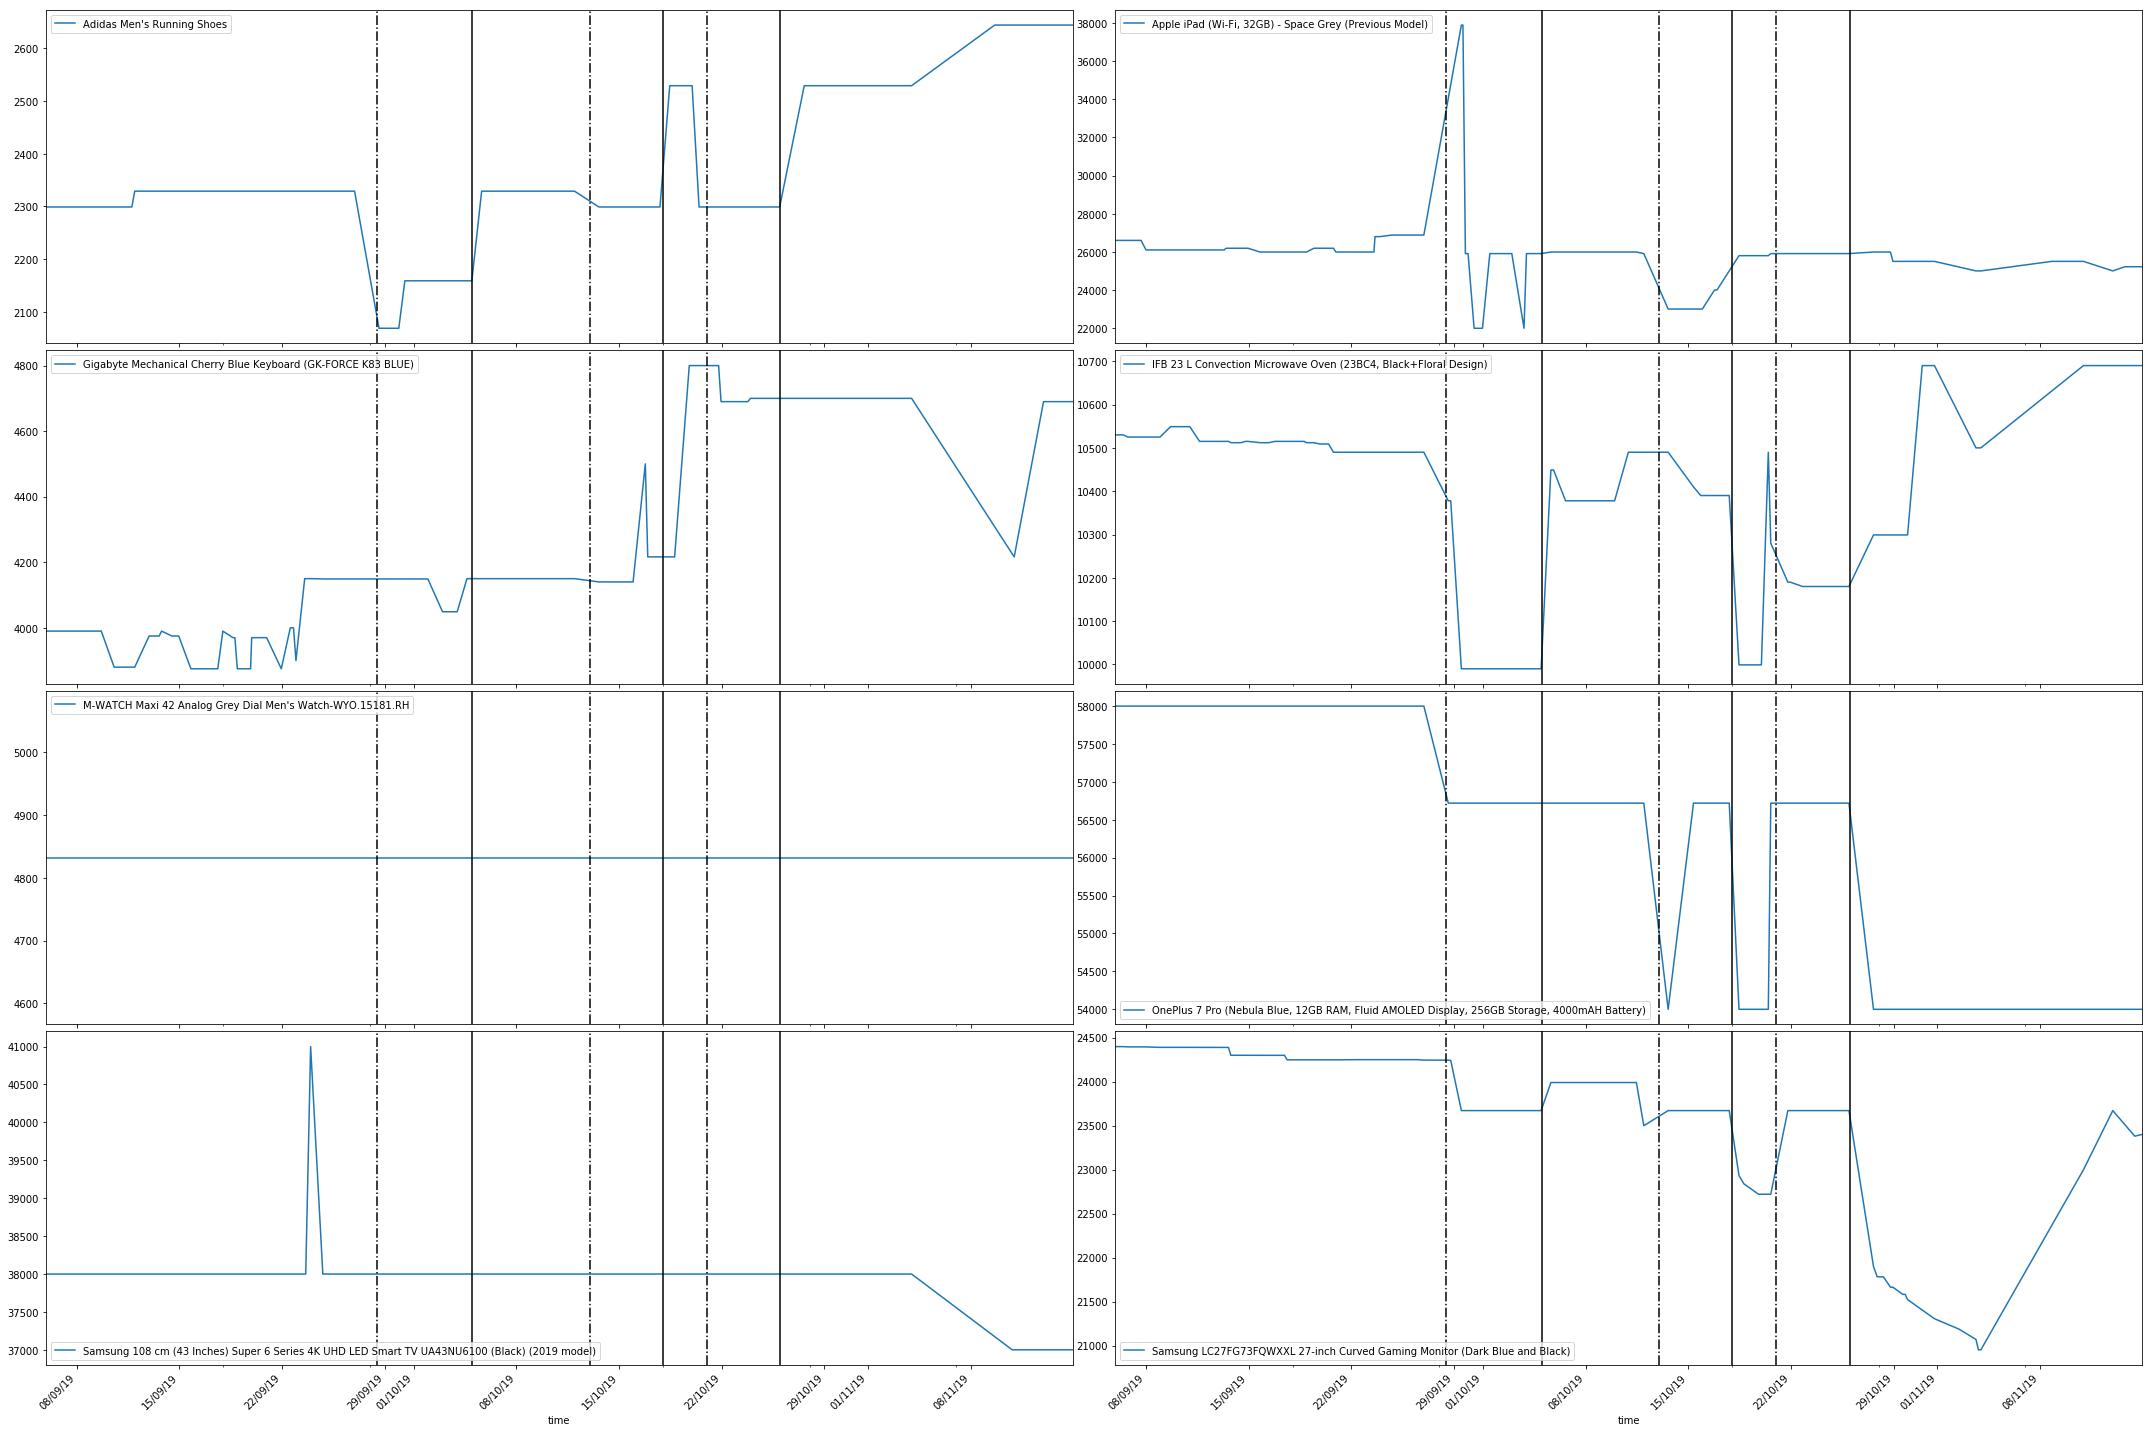

In [53]:
grouped = df.groupby('name')

ncols = 2
nrows = int(np.ceil(grouped.ngroups/ncols))
date_form = DateFormatter("%d/%m/%y")

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,20), sharey=False, sharex=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key)["price"].plot(ax=ax, label=key, legend=True)
#     display(grouped.get_group(key)["price"].index)
#     plt.xticks(rotation=90)
    ax.xaxis_date()
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.xaxis.set_major_formatter(date_form)
    ax.axvline(pd.to_datetime('2019-09-28 12:00:00'), color='k', linestyle='-.')
    ax.axvline(pd.to_datetime('2019-10-04 23:59:00'), color='k', linestyle='-')
    ax.axvline(pd.to_datetime('2019-10-13 00:00:00'), color='k', linestyle='-.')
    ax.axvline(pd.to_datetime('2019-10-17 23:59:00'), color='k', linestyle='-')
    ax.axvline(pd.to_datetime('2019-10-21 00:00:00'), color='k', linestyle='-.')
    ax.axvline(pd.to_datetime('2019-10-25 23:59:00'), color='k', linestyle='-')
fig.tight_layout(h_pad=0, w_pad=0)
ax.legend()
plt.show()

In [23]:
# null hypothesis, avg = 0
# alternate hypothesis, avg <= 0
sm.stats.ztest(df["price_normalized"].values, value = 0, alternative = "smaller")

(-9.214243132997595, 1.5674099899915552e-20)

In [24]:
# the p-value is less than 0.05
# Thus, the null hypothesis can be rejected and we can conclude that
# on an average, the price is lower than the average price for a particular product

In [25]:
from scipy.stats import ttest_ind

In [28]:
df['MainCategory'] = df['category'].apply(lambda x: x.split(",")[0])
df['MainCategory'].replace("0", float('nan'), inplace=True)
main_cat_groups = df.groupby("MainCategory")

In [35]:
ca_stars = main_cat_groups.get_group("Computers & Accessories")["stars"].values

In [41]:
sh_stars = main_cat_groups.get_group("Shoes & Handbags")["stars"].values

In [39]:
ttest_ind(ca_stars, sh_stars)

Ttest_indResult(statistic=14.981940916825545, pvalue=2.61883256370367e-43)

In [42]:
from statsmodels.stats import weightstats as stests

In [54]:
stests.ztest(ca_stars, x2=sh_stars, value=0,alternative='two-sided')

(14.981940916825545, 9.636128634908406e-51)

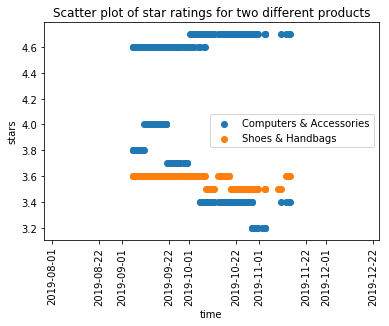

In [66]:
plt.scatter(main_cat_groups.get_group("Computers & Accessories").index.values, ca_stars, label="Computers & Accessories")
plt.scatter(main_cat_groups.get_group("Shoes & Handbags").index.values, sh_stars, label="Shoes & Handbags")
plt.xticks(rotation=90)
plt.xlabel("time")
plt.ylabel("stars")
plt.legend()
plt.title("Scatter plot of star ratings for two different products")
plt.show()

In [48]:
# df_chi = pd.read_csv('chi-test.csv')
from scipy import stats
df_chi = df.copy()
contingency_table=pd.crosstab(df_chi["num_reviews"],df_chi["num_seller_ratings"])
print('contingency_table:\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values:\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values:\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0 - There is a relationship between 2 categorical variables")
else:
    print("Retain H0 - There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0 - There is a relationship between 2 categorical variables")
else:
    print("Retain H0 - There is no relationship between 2 categorical variables")

contingency_table:
 num_seller_ratings  0.0       1.0       2.0       13.0      14.0      \
num_reviews                                                            
0.0                        0         0         0         0         0   
9.0                        0         0         0         0         0   
10.0                       0         0         0         3         0   
11.0                       5         0         0         0        21   
12.0                      14         0         0         0         0   
...                      ...       ...       ...       ...       ...   
11364.0                    0         0         0         0         0   
11370.0                    0         0         0         0         0   
11681.0                    0         0         0         0         0   
11765.0                    0         0         0         0         0   
11883.0                    0         0         0         0         0   

num_seller_ratings  15.0      17.0      26.

In [49]:
# df_chi = pd.read_csv('chi-test.csv')
from scipy import stats
df_chi = df.copy()
contingency_table=pd.crosstab(df_chi["num_reviews"],df_chi["stars"])
print('contingency_table:\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values:\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values:\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0 - There is a relationship between 2 categorical variables")
else:
    print("Retain H0 - There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0 - There is a relationship between 2 categorical variables")
else:
    print("Retain H0 - There is no relationship between 2 categorical variables")

contingency_table:
 stars        0.0  3.2  3.4  3.5  3.6  3.7  3.8  3.9  4.0  4.1  4.5  4.6  4.7
num_reviews                                                                 
0.0          191    0    0    0    0    0    0    0    0    0    0    0    0
9.0            0    0    0    0    0    0   16    0    0    0    0    0    0
10.0           0    0    0    0    0    0    0    0   42    2    0    0    0
11.0           0    0    0    0    0   34    0    0    0    0    0    0    0
12.0           0    0    0    0   14    0    0    0    0    0    0    0    0
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
11364.0        0    0    0    0    0    0    0    0    0    0    0    1    0
11370.0        0    0    0    0    0    0    0    0    0    0    0    1    0
11681.0        0    0    0    0    0    0    0    0    0    0    0    1    0
11765.0        0    0    0    0    0    0    0    0    0    0    0    1    0
11883.0        0    0    0    0    0    0    0    0    0

In [50]:
# df_chi = pd.read_csv('chi-test.csv')
from scipy import stats
df_chi = df.copy()
contingency_table=pd.crosstab(df_chi["num_reviews"],df_chi["answered_qs"])
print('contingency_table:\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values:\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values:\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0 - There is a relationship between 2 categorical variables")
else:
    print("Retain H0 - There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0 - There is a relationship between 2 categorical variables")
else:
    print("Retain H0 - There is no relationship between 2 categorical variables")

contingency_table:
 answered_qs  0.0     16.0    19.0    20.0    21.0    23.0    25.0    27.0    \
num_reviews                                                                   
0.0             191       0       0       0       0       0       0       0   
9.0               0       8       8       0       0       0       0       0   
10.0              0       0      42       0       0       0       0       2   
11.0              0       0      23      11       0       0       0       0   
12.0              0       0       0      14       0       0       0       0   
...             ...     ...     ...     ...     ...     ...     ...     ...   
11364.0           0       0       0       0       0       0       0       0   
11370.0           0       0       0       0       0       0       0       0   
11681.0           0       0       0       0       0       0       0       0   
11765.0           0       0       0       0       0       0       0       0   
11883.0           0       0     

In [81]:
# df_chi = pd.read_csv('chi-test.csv')
from scipy import stats
df_chi = df.copy()
contingency_table=pd.crosstab(df_chi["amazon_delivered"],df_chi["price"])
print('contingency_table:\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values:\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values:\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0 - There is a relationship between 2 categorical variables")
else:
    print("Retain H0 - There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0 - There is a relationship between 2 categorical variables")
else:
    print("Retain H0 - There is no relationship between 2 categorical variables")

contingency_table:
 price             2069.0   2159.0   2299.0   2329.0   2529.0   2644.0   \
amazon_delivered                                                         
0                       0        0        0        0        0        0   
1                       7       14       46       88       32        5   

price             3875.0   3880.0   3900.0   3970.0   ...  26600.0  26799.0  \
amazon_delivered                                      ...                     
0                       0        0        0        0  ...        8        4   
1                      18        7        1       11  ...        0        0   

price             26880.0  36999.0  37899.0  37999.0  40999.0  53999.0  \
amazon_delivered                                                         
0                      14        0        2        0        0        0   
1                       0        6        0      186        2       40   

price             56719.0  57999.0  
amazon_delivered                

In [82]:
df["amazon_delivered"]

time
2019-09-05 21:15:03.783985+00:00    1
2019-09-05 21:15:08.217605+00:00    1
2019-09-05 21:15:11.753613+00:00    1
2019-09-05 21:15:15.448221+00:00    0
2019-09-05 21:15:19.391380+00:00    1
                                   ..
2019-11-14 23:00:28.022280+00:00    0
2019-11-14 23:00:35.470420+00:00    1
2019-11-14 23:00:39.815235+00:00    1
2019-11-14 23:00:44.160745+00:00    1
2019-11-14 23:00:48.704287+00:00    1
Name: amazon_delivered, Length: 1535, dtype: int64